In [0]:

import importlib.util
import sys
from google.colab import drive

drive.mount('/content/gdrive')

# To add a directory with your code into a list of directories 
# which will be searched for packages


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#path to custom dataloader
sys.path.append('/content/gdrive/My Drive/hw2/code/')
import data_loader


In [0]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms
from torch.nn import functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from data_loader import get_dataset
import torch.optim as optim
from torch.optim import Adam, SGD, LBFGS
import numpy as np

In [0]:
batch_size = 256
num_epochs = 10
max_iters  = 1000
print_iter = 25 # Prints results every n iterations
conv_shapes = [[1,64,128]] #

# Model parameters
input_dim = 128
embed_dim = 64
num_labels = 26
cuda = torch.cuda.is_available()

In [0]:
#gettinig data using DataLoader class , modified code
dataset = get_dataset()

#word accuracies function based on letters, required dataset.nextletter info
def wordaccuracies(pred,actual):
  incorrectwords = 0
  totalwords = 0
  flag = True

  for i in range(len(pred)):

    if pred[i] != actual[i]:
      flag= False
    if dataset.nextletter[split+i] == -1:
      if flag == False:
        incorrectwords+=1
        flag  = True
      totalwords = totalwords+1

  wordaccuracy = 1 - incorrectwords/totalwords
  print("Word accuracy: ", wordaccuracy)
  return wordaccuracy
  print("\n")


In [0]:
#leNet architecture
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 3, 3,padding=1)
        self.conv2 = nn.Conv2d(3, 3, 3,padding=1)
        self.fc1   = nn.Linear(24, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 26)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [0]:
#model, loss, optimizers
lenetmodel =  LeNet()
criterion = nn.CrossEntropyLoss()
optim = Adam(lenetmodel.parameters())


In [0]:
#testing function
def testingmodel():
    finalletteracc= 0 
    testpredictedletters,testactualletters=[],[]
    for i_batch, sample in enumerate(test_loader):
            
    #       print("Batch=", i_batch)
            test_X = sample[0]
            test_Y = sample[1]
    #       print(len(test_X))

            lastflag = (len(test_X)<256)
            if lastflag:
              test_X= test_X.view(len(test_X),1,16,8)
              test_X= test_X.repeat(1,3,1,1)
              test_Y = test_Y.view(len(train_Y),26)
            else:
              test_X= test_X.view(256,1,16,8)
              test_X= test_X.repeat(1,3,1,1)
              test_Y = test_Y.view(256,26)
            
            
            if cuda:
                test_X = test_X.cuda()
                test_Y = test_Y.cuda()
            labels=  torch.max(test_Y, 1)[1]

            outputs = lenetmodel(test_X)
            loss = criterion(outputs,labels)

            running_loss = 0.0
            running_corrects = 0
            _, preds = torch.max(outputs, 1)
            testactualletters.extend(labels.tolist())
            testpredictedletters.extend(preds.tolist())
            running_loss += loss.item() * test_X.size(0)
            running_corrects += torch.sum(preds == (labels.data))
            
            epoch_loss = running_loss / len(test_Y)
            epoch_acc = running_corrects.double() / len(test_Y)
            finalletteracc = finalletteracc + len(test_Y)*epoch_acc
            #print("Letter accuracy =",epoch_acc)

    wtestingepoc.append(wordaccuracies(testpredictedletters,testactualletters))
    testingepoc.append(finalletteracc/len(test))
    print("Testing acc = :",finalletteracc/len(test) )

In [0]:
#training and 
dataset = get_dataset()
trainingepoc,testingepoc=[],[]
wtrainingepoc,wtestingepoc=[],[]
split = int(0.5 * len(dataset.data)) # train-test split
train_data, test_data = dataset.data[:split], dataset.data[split:]
train_target, test_target = dataset.target[:split], dataset.target[split:]
    # Convert dataset into torch tensors
train = data_utils.TensorDataset(torch.tensor(train_data).float(), torch.tensor(train_target).long())
test = data_utils.TensorDataset(torch.tensor(test_data).float(), torch.tensor(test_target).long())

# Define train and test loaders
train_loader = data_utils.DataLoader(train,  # dataset to load from
                                         batch_size=batch_size,  # examples per batch (default: 1)
                                         shuffle=True,
                                         sampler=None,  # if a sampling method is specified, `shuffle` must be False
                                         num_workers=5,  # subprocesses to use for sampling
                                         pin_memory=False,  # whether to return an item pinned to GPU
                                         )

test_loader = data_utils.DataLoader(test,  # dataset to load from
                                        batch_size=batch_size,  # examples per batch (default: 1)
                                        shuffle=False,
                                        sampler=None,  # if a sampling method is specified, `shuffle` must be False
                                        num_workers=5,  # subprocesses to use for sampling
                                        pin_memory=False,  # whether to return an item pinned to GPU
                                        )

    
for i in range(100):
    trainpredictedletters,trainactualletters=[],[]
    trainingacc= 0
    if i%1==0:
          print("\n  Processing epoch {}".format(i))
    
 #   print('Loaded dataset... ')

    # Now start training
    for i_batch, sample in enumerate(train_loader):
        if i_batch%25==0:
          print("Batch=", i_batch)
        train_X = sample[0]
        train_Y = sample[1]

        lastflag = (len(train_X)<256)
        if lastflag:
          train_X= train_X.view(len(train_X),1,16,8)
          train_X= train_X.repeat(1,3,1,1)
          train_Y = train_Y.view(len(train_Y),26)
        else:
          train_X= train_X.view(256,1,16,8)
          train_X= train_X.repeat(1,3,1,1)
          train_Y = train_Y.view(256,26)
        
        if cuda:
            train_X = train_X.cuda()
            train_Y = train_Y.cuda()
        
        labels=  torch.max(train_Y, 1)[1]

        
        

        running_loss = 0.0
        running_corrects = 0

        optim.zero_grad()
        outputs = lenetmodel(train_X)
        loss = criterion(outputs, labels)
        loss.backward()


        optim.step()

        outputs = lenetmodel(train_X)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs, 1)

        
        trainactualletters.extend(labels.tolist())
        trainpredictedletters.extend(preds.tolist())
        
        running_loss += loss.item() * train_X.size(0)
        running_corrects += torch.sum(preds == (labels).data)

        epoch_loss = running_loss / len(train_Y)
        epoch_acc = running_corrects.double() / len(train_Y)
        
        trainingacc = trainingacc + len(train_X)*epoch_acc
        if i_batch%25==0:
          print("Letter accuracy =",epoch_acc)

    wtrainingepoc.append(wordaccuracies(trainpredictedletters,trainactualletters)) 
    trainingepoc.append(trainingacc/len(train))
    print("Training acc = :",trainingacc/len(train))

    #testing
    testingmodel()
    
    





  Processing epoch 0
Batch= 0
Letter accuracy = tensor(0.0586, dtype=torch.float64)
Batch= 25
Letter accuracy = tensor(0.1133, dtype=torch.float64)
Batch= 50
Letter accuracy = tensor(0.2188, dtype=torch.float64)
Batch= 75
Letter accuracy = tensor(0.3633, dtype=torch.float64)
Batch= 100
Letter accuracy = tensor(0.4570, dtype=torch.float64)
Word accuracy:  0.038383250945042136
Training acc = : tensor(0.2248, dtype=torch.float64)
Word accuracy:  0.07938354172724627
Testing acc = : tensor(0.4577, dtype=torch.float64)

  Processing epoch 1
Batch= 0
Letter accuracy = tensor(0.4688, dtype=torch.float64)
Batch= 25
Letter accuracy = tensor(0.5352, dtype=torch.float64)
Batch= 50
Letter accuracy = tensor(0.5742, dtype=torch.float64)
Batch= 75
Letter accuracy = tensor(0.6172, dtype=torch.float64)
Batch= 100
Letter accuracy = tensor(0.6133, dtype=torch.float64)
Word accuracy:  0.14335562663564994
Training acc = : tensor(0.5592, dtype=torch.float64)
Word accuracy:  0.15673160802558883
Testing acc =

100

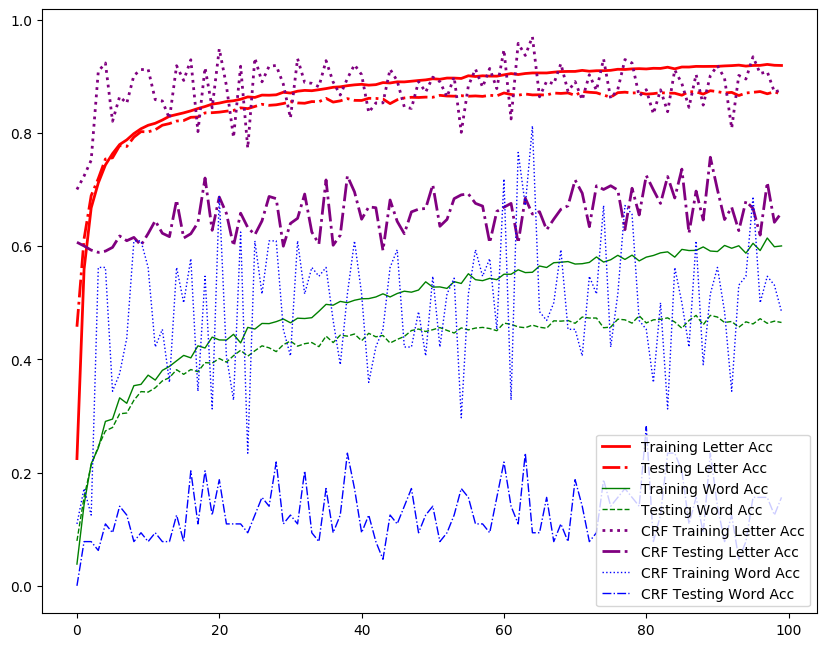

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
 
#plottinig of the Training+testing ->  letter + word accuracies
#results of crf model
crftrainingepoc =[0.7001972386587771, 0.724, 0.7518656716417911, 0.9088983050847458, 0.9237113402061856, 0.8207024029574861, 0.8644400785854617, 0.8524945770065075, 0.9016393442622951, 0.9118942731277533, 0.9128540305010894, 0.8590021691973969, 0.8565656565656565, 0.8252427184466019, 0.9188034188034188, 0.8927875243664717, 0.9293361884368309, 0.8024193548387096, 0.9154135338345865, 0.8443983402489627, 0.9486607142857143, 0.8837675350701403, 0.7922077922077922, 0.9178947368421052, 0.7732342007434945, 0.9323770491803278, 0.8903508771929824, 0.917960088691796, 0.9192307692307692, 0.8862275449101796, 0.8263358778625954, 0.9313131313131313, 0.889344262295082, 0.8877551020408163, 0.8817204301075269, 0.927765237020316, 0.8900414937759336, 0.8670411985018727, 0.8962075848303394, 0.9206008583690987, 0.9029535864978903, 0.8361904761904762, 0.8530612244897959, 0.8531746031746031, 0.9126984126984127, 0.8920570264765784, 0.8460038986354775, 0.8433962264150944, 0.8907922912205567, 0.8722109533468559, 0.898635477582846, 0.8906560636182903, 0.8634615384615385, 0.8991596638655462, 0.8011472275334608, 0.8832599118942731, 0.9128712871287129, 0.8809523809523809, 0.9140461215932913, 0.8784860557768924, 0.9471544715447154, 0.8247619047619048, 0.9583333333333334, 0.9369565217391305, 0.9700460829493087, 0.8638941398865785, 0.8914405010438413, 0.8866799204771372, 0.9224652087475149, 0.8733624454148472, 0.8908045977011494, 0.858508604206501, 0.9028925619834711, 0.8752598752598753, 0.9308176100628931, 0.8608349900596421, 0.8770161290322581, 0.9297052154195011, 0.9235668789808917, 0.8649237472766884, 0.8765432098765432, 0.8336713995943205, 0.8762475049900199, 0.837573385518591, 0.9113924050632911, 0.887378640776699, 0.8452914798206278, 0.9034090909090909, 0.8492871690427699, 0.9014373716632443, 0.9191489361702128, 0.896551724137931, 0.808300395256917, 0.9016736401673641, 0.8953271028037383, 0.9346938775510204, 0.9050387596899225, 0.908315565031983, 0.872255489021956, 0.8763326226012793, 0.8685258964143426]
crftestingepoc = [0.6069114470842333, 0.600418410041841, 0.5930735930735931, 0.589098532494759, 0.5912698412698413, 0.5979166666666667, 0.6181102362204725, 0.609704641350211, 0.6155419222903885, 0.6016771488469602, 0.6222664015904572, 0.6449579831932774, 0.6228710462287105, 0.6168421052631579, 0.6814516129032258, 0.614406779661017, 0.621978021978022, 0.6415929203539823, 0.7204081632653061, 0.628099173553719, 0.6868250539956804, 0.6579925650557621, 0.600418410041841, 0.6582809224318659, 0.6330472103004292, 0.6202247191011236, 0.6446469248291572, 0.6878850102669405, 0.684, 0.6, 0.6402439024390244, 0.6492248062015504, 0.6921296296296297, 0.625, 0.6039603960396039, 0.7170626349892009, 0.6016260162601627, 0.6194503171247357, 0.724, 0.69593147751606, 0.6476377952755905, 0.6693877551020408, 0.668, 0.5923694779116466, 0.681640625, 0.6438923395445134, 0.6220806794055201, 0.6606060606060606, 0.6653620352250489, 0.6666666666666666, 0.7085201793721974, 0.6351648351648351, 0.6473118279569893, 0.6840077071290944, 0.690677966101695, 0.6923076923076923, 0.6756756756756757, 0.6708333333333333, 0.6059405940594059, 0.661504424778761, 0.6688172043010753, 0.6756152125279642, 0.6059322033898306, 0.6847826086956522, 0.6567460317460317, 0.6609848484848485, 0.6290322580645161, 0.6477732793522267, 0.6651785714285714, 0.6713426853707415, 0.7169421487603306, 0.6936542669584245, 0.6344969199178645, 0.7066381156316917, 0.7002053388090349, 0.7067833698030634, 0.6991150442477876, 0.6291666666666667, 0.7023809523809523, 0.655241935483871, 0.7248908296943232, 0.6995967741935484, 0.6755102040816326, 0.7230443974630021, 0.6851485148514852, 0.7361623616236163, 0.6229166666666667, 0.6973684210526315, 0.6461864406779662, 0.7571428571428571, 0.6998011928429424, 0.6470588235294118, 0.6687898089171974, 0.6275395033860045, 0.6796714579055442, 0.6666666666666666, 0.6196581196581197, 0.7127192982456141, 0.6422413793103449, 0.6591422121896162, 0.6527196652719666]
crfwtrainingepoc = [0.109375, 0.171875, 0.125, 0.5625, 0.5625, 0.34375, 0.375, 0.4375, 0.609375, 0.609375, 0.5625, 0.421875, 0.453125, 0.359375, 0.5625, 0.5, 0.578125, 0.34375, 0.546875, 0.3125, 0.6875, 0.40625, 0.328125, 0.625, 0.234375, 0.609375, 0.515625, 0.609375, 0.609375, 0.453125, 0.40625, 0.609375, 0.515625, 0.5625, 0.546875, 0.5625, 0.46875, 0.390625, 0.515625, 0.609375, 0.515625, 0.359375, 0.421875, 0.453125, 0.5625, 0.59375, 0.421875, 0.421875, 0.484375, 0.40625, 0.546875, 0.421875, 0.515625, 0.5434782608695652, 0.296875, 0.515625, 0.59375, 0.546875, 0.578125, 0.453125, 0.71875, 0.328125, 0.765625, 0.671875, 0.8125, 0.484375, 0.46875, 0.5, 0.59375, 0.453125, 0.453125, 0.40625, 0.546875, 0.515625, 0.671875, 0.421875, 0.515625, 0.671875, 0.65625, 0.46875, 0.453125, 0.359375, 0.5, 0.3125, 0.5625, 0.5, 0.421875, 0.609375, 0.390625, 0.515625, 0.5625, 0.484375, 0.34375, 0.53125, 0.546875, 0.6875, 0.5, 0.546875, 0.53125, 0.484375, 0.46875]
crfwtestingepoc= [0.0, 0.078125, 0.078125, 0.0625, 0.109375, 0.09375, 0.140625, 0.125, 0.078125, 0.09375, 0.078125, 0.09375, 0.078125, 0.078125, 0.125, 0.078125, 0.203125, 0.109375, 0.203125, 0.125, 0.1875, 0.109375, 0.109375, 0.109375, 0.09375, 0.125, 0.15625, 0.140625, 0.21875, 0.109375, 0.125, 0.109375, 0.203125, 0.09375, 0.078125, 0.171875, 0.09375, 0.125, 0.234375, 0.171875, 0.09375, 0.125, 0.078125, 0.046875, 0.125, 0.109375, 0.140625, 0.171875, 0.09375, 0.125, 0.140625, 0.078125, 0.09375, 0.125, 0.171875, 0.15625, 0.109375, 0.109375, 0.09375, 0.15625, 0.21875, 0.140625, 0.109375, 0.234375, 0.09375, 0.09375, 0.15625, 0.078125, 0.109375, 0.078125, 0.1875, 0.140625, 0.078125, 0.09375, 0.1875, 0.140625, 0.15625, 0.171875, 0.15625, 0.140625, 0.28125, 0.078125, 0.125, 0.234375, 0.234375, 0.203125, 0.109375, 0.15625, 0.09375, 0.234375, 0.140625, 0.078125, 0.125, 0.046875, 0.078125, 0.15625, 0.15625, 0.15625, 0.125, 0.15625, 0.109375]

#results of crf model
restrainingepoc = [0.36500997085442555, 0.47614664825893543, 0.5092805645037582, 0.5307946003988342, 0.5500076698880196, 0.5712916091425065, 0.5789998466022396, 0.5987881576928977, 0.6154701641356036, 0.6189216137444393, 0.6321138211382114, 0.6424298205246204, 0.6555836784782942, 0.6678554993097101, 0.6665516183463721, 0.6751035434882651, 0.6810477067034821, 0.6949685534591195, 0.6994554379506059, 0.7063966866083755, 0.70651173492867, 0.7175563736769444, 0.7168660837551771, 0.7286777113054149, 0.7353121644423991, 0.7430971007823286, 0.7457048627090045, 0.7425602086209542, 0.7543718361711919, 0.7582834790612057, 0.7533747507286394, 0.7666820064427059, 0.766490259242215, 0.770631998772818, 0.7770363552692131, 0.7731247123791992, 0.7792606227949072, 0.7792606227949072, 0.7788387789538272, 0.7881576928976837, 0.7891931277803343, 0.7962877741984967, 0.7932198189906428, 0.8008513575701794, 0.7985503911642889, 0.8017717441325356, 0.8067188219052002, 0.7999309710078233, 0.8060668814235312, 0.8125095873600245, 0.8104387175947231, 0.8157309403282712, 0.8120110446387483, 0.8114741524773739, 0.8162294830495475, 0.8171882190520018, 0.8183387022549471, 0.8207163675410339, 0.8234391777880042, 0.8204862709004448, 0.824474612670655, 0.8285013038809633, 0.8294983893235158, 0.8320294523699954, 0.8281561589200798, 0.8331799355729407, 0.833064887252646, 0.8331032366927443, 0.8382804111059978, 0.8374750728639362, 0.8324129467709771, 0.8424988495167971, 0.8390857493480595, 0.8358643963798128, 0.8386639055069796, 0.837666820064427, 0.8355959502991256, 0.8381270133456051, 0.8472541800889707, 0.8469090351280871, 0.844684767602393, 0.8478294216904433, 0.8501303880963338, 0.8512041724190826, 0.8513959196195735, 0.8486731093726031, 0.8556143580303728, 0.8507439791379046, 0.8477143733701488, 0.8561512501917472, 0.856764841233318, 0.855652707470471, 0.8509740757784936, 0.8563046479521399, 0.8564580457125326, 0.8525464028225188, 0.8617119190059825, 0.8632458966099095, 0.8583371682773432, 0.8593342537198957]
restestingepoc = [0.43626323055683386, 0.4835097407577849, 0.5032597024083448, 0.48995244669427823, 0.5154164749194662, 0.5232014112593956, 0.5223577235772358, 0.5447537965945697, 0.537352354655622, 0.5412256481055376, 0.5429130234698574, 0.5470931124405584, 0.5496241754870379, 0.5613591041570793, 0.5492406810860562, 0.5516950452523393, 0.5516183463721429, 0.5462877741984967, 0.5502761159687068, 0.5537659150176407, 0.5544562049394078, 0.5508513575701794, 0.5539576622181316, 0.5459809786777113, 0.5432965178708391, 0.5543795060592115, 0.5544178554993097, 0.5518100935726339, 0.5580227028685382, 0.5516566958122411, 0.5582527995091272, 0.5502377665286087, 0.5491256327657617, 0.5518867924528302, 0.5501610676484123, 0.5488571866850744, 0.5536508666973462, 0.5450605921153551, 0.547246510200951, 0.554724651020095, 0.5444853505138825, 0.5501227182083142, 0.5541110599785243, 0.5507746586899831, 0.5524236846142047, 0.5550314465408805, 0.5518484430127321, 0.5471314618806565, 0.5576008590274582, 0.5455974842767296, 0.5435266145114281, 0.5555299892621568, 0.5458275809173186, 0.5470931124405584, 0.5518100935726339, 0.5418775885872066, 0.5431814695505446, 0.5520785396533211, 0.5502761159687068, 0.5505829114894922, 0.5525387329344992, 0.5490872833256635, 0.5462494247583985, 0.5477834023623255, 0.5492790305261543, 0.5531139745359718, 0.5522319374137138, 0.5498159226875288, 0.5502761159687068, 0.5526537812547937, 0.5559518331032367, 0.551196502531063, 0.5552998926215678, 0.5529989262156773, 0.5550697959809787, 0.5515416474919466, 0.5506212609295904, 0.5464028225187912, 0.5488955361251726, 0.5549930971007824, 0.5520018407731248, 0.5485503911642889, 0.5508513575701794, 0.5508897070102776, 0.5514649486117502, 0.5551081454210769, 0.550084368768216, 0.5480901978831109, 0.5498542721276269, 0.5482435956435036, 0.5580994017487345, 0.5536892161374444, 0.5526921306948919, 0.5594416321521706, 0.5525387329344992, 0.5501227182083142, 0.5471314618806565, 0.5508513575701794, 0.5549930971007824, 0.5442169044331953]
reswtrainingepoc = [0.07714958775029446, 0.10865724381625441, 0.11454652532391052, 0.13515901060070667, 0.13545347467608948, 0.14958775029446403, 0.14899882214369842, 0.1816843345111896, 0.17785630153121323, 0.18404004711425204, 0.1925795053003534, 0.18669022379269729, 0.2037691401648999, 0.2093639575971732, 0.2164310954063604, 0.22290930506478213, 0.233510011778563, 0.24263839811542987, 0.2385159010600707, 0.23939929328621912, 0.24352179034157828, 0.25294464075382805, 0.25, 0.26884570082449943, 0.2714958775029447, 0.28180212014134276, 0.28062426383981154, 0.2879858657243817, 0.290341578327444, 0.2944640753828033, 0.2912249705535924, 0.30859835100117783, 0.308303886925795, 0.3124263839811543, 0.32155477031802115, 0.30388692579505305, 0.3309776207302709, 0.31507656065959955, 0.31507656065959955, 0.3295053003533569, 0.3362779740871613, 0.3530624263839811, 0.3409893992932862, 0.35011778563015317, 0.3527679623085983, 0.3527679623085983, 0.3639575971731449, 0.35512367491166075, 0.3401060070671378, 0.37131919905771493, 0.36012956419316844, 0.36012956419316844, 0.3574793875147232, 0.3707302709069493, 0.36101295641931685, 0.3736749116607774, 0.3748527679623086, 0.3792697290930507, 0.3878091872791519, 0.37338044758539457, 0.37691401648998824, 0.39045936395759717, 0.39399293286219084, 0.40518256772673733, 0.39075382803298, 0.3975265017667845, 0.39428739693757364, 0.39958775029446403, 0.4048881036513545, 0.4095995288574794, 0.40135453474676086, 0.416077738515901, 0.410188457008245, 0.4095995288574794, 0.40518256772673733, 0.41224970553592466, 0.3989988221436984, 0.4084216725559482, 0.42402826855123676, 0.4216725559481743, 0.42285041224970554, 0.4272673733804476, 0.42815076560659604, 0.4328621908127208, 0.43934040047114253, 0.432567726737338, 0.43904593639575973, 0.42903415783274446, 0.42756183745583043, 0.43580683156654887, 0.44140164899882217, 0.43904593639575973, 0.42815076560659604, 0.4387514723203769, 0.4496466431095406, 0.4372791519434629, 0.4652532391048292, 0.4599528857479388, 0.4378680800942285, 0.443168433451119]
reswtestingepoc= [0.07862190812720848, 0.09481743227326267, 0.09923439340400475, 0.091283863368669, 0.11189634864546527, 0.12161366313309774, 0.10482921083627794, 0.12926972909305068, 0.12396937573616018, 0.13515901060070667, 0.13221436984687873, 0.12720848056537104, 0.13427561837455826, 0.13457008244994106, 0.1251472320376914, 0.125736160188457, 0.13398115429917545, 0.12750294464075385, 0.12279151943462896, 0.13457008244994106, 0.12956419316843348, 0.125736160188457, 0.12838633686690226, 0.13898704358068315, 0.13191990577149593, 0.1366313309776207, 0.13545347467608948, 0.1304475853945819, 0.1301531213191991, 0.13250883392226154, 0.13810365135453473, 0.1360424028268551, 0.1304475853945819, 0.13368669022379265, 0.1369257950530035, 0.1254416961130742, 0.13368669022379265, 0.1298586572438163, 0.1310365135453475, 0.13339222614840984, 0.13457008244994106, 0.1301531213191991, 0.13869257950530034, 0.12809187279151946, 0.13987043580683156, 0.1369257950530035, 0.13398115429917545, 0.1304475853945819, 0.14016489988221437, 0.13457008244994106, 0.13545347467608948, 0.13221436984687873, 0.12956419316843348, 0.12779740871613665, 0.13574793875147229, 0.1298586572438163, 0.12868080094228507, 0.13368669022379265, 0.1301531213191991, 0.13486454652532387, 0.13427561837455826, 0.1310365135453475, 0.12338044758539457, 0.1304475853945819, 0.1248527679623086, 0.13162544169611312, 0.12661955241460543, 0.1310365135453475, 0.1301531213191991, 0.1304475853945819, 0.13751472320376912, 0.12897526501766787, 0.13368669022379265, 0.13162544169611312, 0.13339222614840984, 0.13368669022379265, 0.13368669022379265, 0.1248527679623086, 0.12897526501766787, 0.1366313309776207, 0.1248527679623086, 0.13309776207302704, 0.125736160188457, 0.13280329799764434, 0.1298586572438163, 0.1363368669022379, 0.12956419316843348, 0.12632508833922262, 0.12897526501766787, 0.1298586572438163, 0.1304475853945819, 0.13368669022379265, 0.12661955241460543, 0.13162544169611312, 0.13486454652532387, 0.13309776207302704, 0.12338044758539457, 0.1301531213191991, 0.12779740871613665, 0.12720848056537104]
y5 = crftrainingepoc[:100]
y6 = crftestingepoc[:100]
y7 = crfwtrainingepoc[:100]
y8 = crfwtestingepoc[:100]

y9 = restrainingepoc[:100]
y10 = restestingepoc[:100]
y11 = reswtrainingepoc[:100]
y12 = reswtestingepoc[:100]



# Data results of lenetmodel
x= [x for x in  range(100)]
y1 = trainingepoc
y2 = testingepoc
y3 = wtrainingepoc
y4 = wtestingepoc


w = 10
h = 8
d = 100
plt.figure(figsize=(w, h), dpi=d)

plt.plot(x, y1, color='red', linewidth=2,  label="Training Letter Acc")
plt.plot(x, y2, color='red', linewidth=2,linestyle='dashdot',   label="Testing Letter Acc")
plt.plot(x, y3, color='green', linewidth=1, label="Training Word Acc")
plt.plot(x, y4, color='green', linewidth=1,linestyle='dashed',  label="Testing Word Acc")
plt.plot(x, y5, color='purple', linewidth=2, linestyle='dotted', label="CRF Training Letter Acc")
plt.plot(x, y6, color='purple', linewidth=2,linestyle='dashdot',   label="CRF Testing Letter Acc")
plt.plot(x, y7, color='blue', linewidth=1, linestyle='dotted',  label="CRF Training Word Acc")
plt.plot(x, y8, color='blue', linewidth=1,linestyle='dashdot',  label="CRF Testing Word Acc")


plt.legend()

plt.savefig("accuracies.png")


In [0]:
max(testingepoc)

tensor(0.8473, dtype=torch.float64)

In [0]:
len(train)

26076

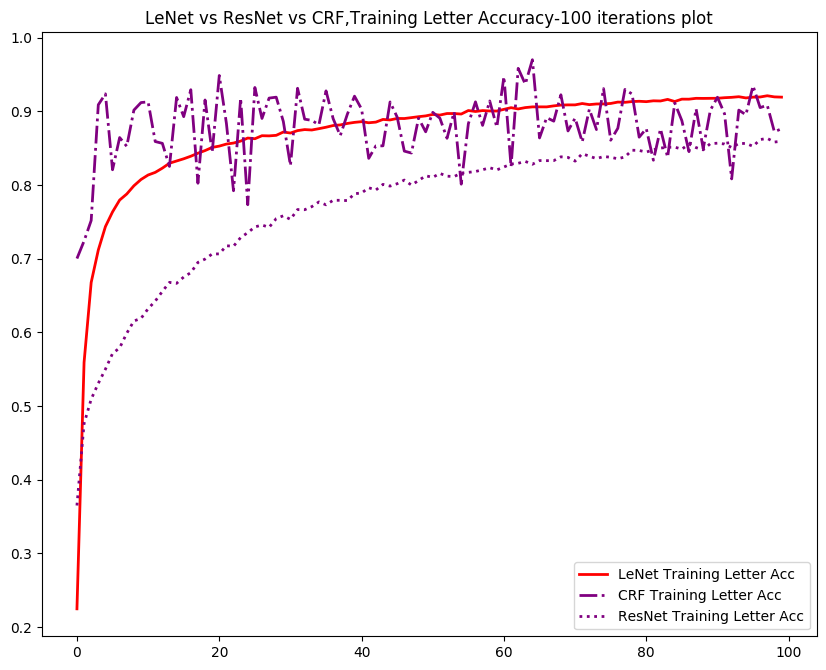

In [41]:


w = 10
h = 8
d = 100
plt.figure(figsize=(w, h), dpi=d)

plt.plot(x, y1, color='red', linewidth=2,  label="LeNet Training Letter Acc")
#plt.plot(x, y2, color='red', linewidth=2,linestyle='dashdot',   label="Testing Letter Acc")
#plt.plot(x, y3, color='green', linewidth=1, label="Training Word Acc")
#plt.plot(x, y4, color='green', linewidth=1,linestyle='dashed',  label="Testing Word Acc")
plt.plot(x, y5, color='purple', linewidth=2, linestyle='dashdot', label="CRF Training Letter Acc")
#plt.plot(x, y6, color='purple', linewidth=2,linestyle='dashdot',   label="CRF Testing Letter Acc")
#plt.plot(x, y7, color='blue', linewidth=1, linestyle='dashdot',  label="CRF Training Word Acc")
#plt.plot(x, y8, color='blue', linewidth=1,linestyle='dashdot',  label="CRF Testing Word Acc")
plt.plot(x, y9, color='purple', linewidth=2, linestyle='dotted', label="ResNet Training Letter Acc")
#plt.plot(x, y10, color='purple', linewidth=2,linestyle='dotted',   label="ResNet Testing Letter Acc")
#plt.plot(x, y11, color='blue', linewidth=1, linestyle='dotted',  label="ResNet Training Word Acc")
#plt.plot(x, y12, color='blue', linewidth=1,linestyle='dotted',  label="ResNet Testing Word Acc")
plt.title("LeNet vs ResNet vs CRF,Training Letter Accuracy-100 iterations plot")
plt.legend()

plt.savefig("accuracies.png")


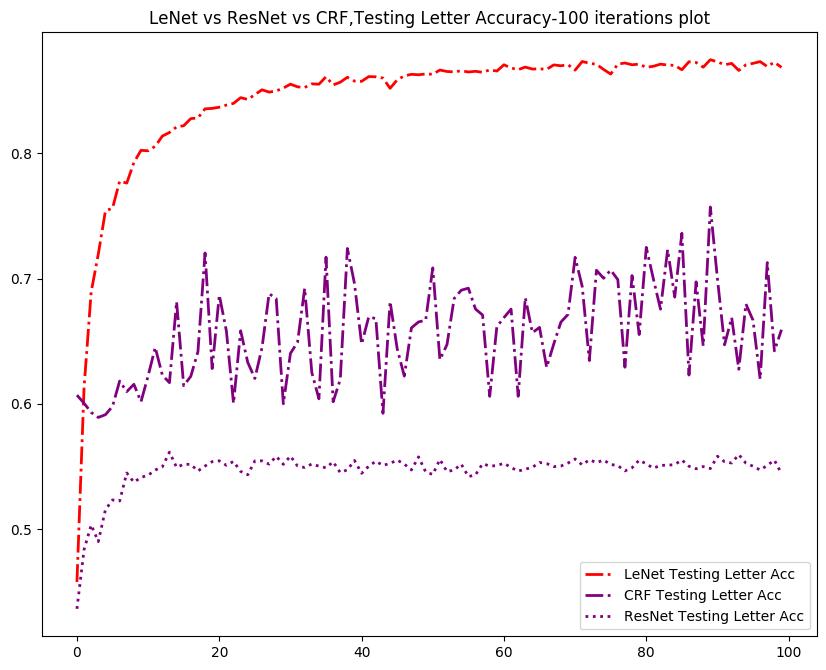

In [42]:


w = 10
h = 8
d = 100
plt.figure(figsize=(w, h), dpi=d)

#plt.plot(x, y1, color='red', linewidth=2,  label="Training Letter Acc")
plt.plot(x, y2, color='red', linewidth=2,linestyle='dashdot',   label="LeNet Testing Letter Acc")
#plt.plot(x, y3, color='green', linewidth=1, label="Training Word Acc")
#plt.plot(x, y4, color='green', linewidth=1,linestyle='dashed',  label="Testing Word Acc")
#plt.plot(x, y5, color='purple', linewidth=2, linestyle='dashdot', label="CRF Training Letter Acc")
plt.plot(x, y6, color='purple', linewidth=2,linestyle='dashdot',   label="CRF Testing Letter Acc")
#plt.plot(x, y7, color='blue', linewidth=1, linestyle='dashdot',  label="CRF Training Word Acc")
#plt.plot(x, y8, color='blue', linewidth=1,linestyle='dashdot',  label="CRF Testing Word Acc")
#plt.plot(x, y9, color='purple', linewidth=2, linestyle='dotted', label="ResNet Training Letter Acc")
plt.plot(x, y10, color='purple', linewidth=2,linestyle='dotted',   label="ResNet Testing Letter Acc")
#plt.plot(x, y11, color='blue', linewidth=1, linestyle='dotted',  label="ResNet Training Word Acc")
#plt.plot(x, y12, color='blue', linewidth=1,linestyle='dotted',  label="ResNet Testing Word Acc")
plt.title("LeNet vs ResNet vs CRF,Testing Letter Accuracy-100 iterations plot")
plt.legend()

plt.savefig("accuracies.png")


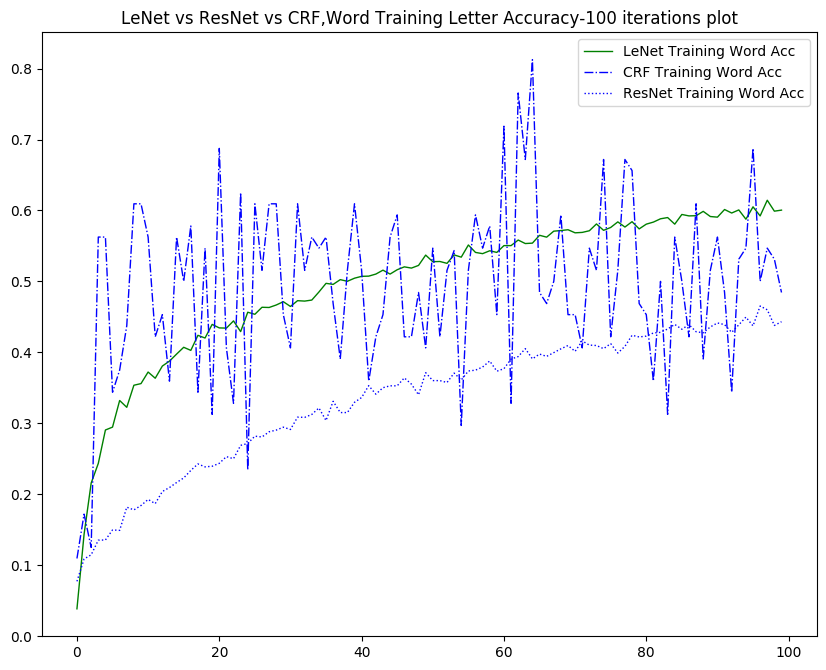

In [43]:


w = 10
h = 8
d = 100
plt.figure(figsize=(w, h), dpi=d)

#plt.plot(x, y1, color='red', linewidth=2,  label="Training Letter Acc")
#plt.plot(x, y2, color='red', linewidth=2,linestyle='dashdot',   label="Testing Letter Acc")
plt.plot(x, y3, color='green', linewidth=1, label="LeNet Training Word Acc")
#plt.plot(x, y4, color='green', linewidth=1,linestyle='dashed',  label="Testing Word Acc")
#plt.plot(x, y5, color='purple', linewidth=2, linestyle='dashdot', label="CRF Training Letter Acc")
#plt.plot(x, y6, color='purple', linewidth=2,linestyle='dashdot',   label="CRF Testing Letter Acc")
plt.plot(x, y7, color='blue', linewidth=1, linestyle='dashdot',  label="CRF Training Word Acc")
#plt.plot(x, y8, color='blue', linewidth=1,linestyle='dashdot',  label="CRF Testing Word Acc")
#plt.plot(x, y9, color='purple', linewidth=2, linestyle='dotted', label="ResNet Training Letter Acc")
#plt.plot(x, y10, color='purple', linewidth=2,linestyle='dotted',   label="ResNet Testing Letter Acc")
plt.plot(x, y11, color='blue', linewidth=1, linestyle='dotted',  label="ResNet Training Word Acc")
#plt.plot(x, y12, color='blue', linewidth=1,linestyle='dotted',  label="ResNet Testing Word Acc")
plt.title("LeNet vs ResNet vs CRF,Word Training Letter Accuracy-100 iterations plot")
plt.legend()

plt.savefig("accuracies.png")


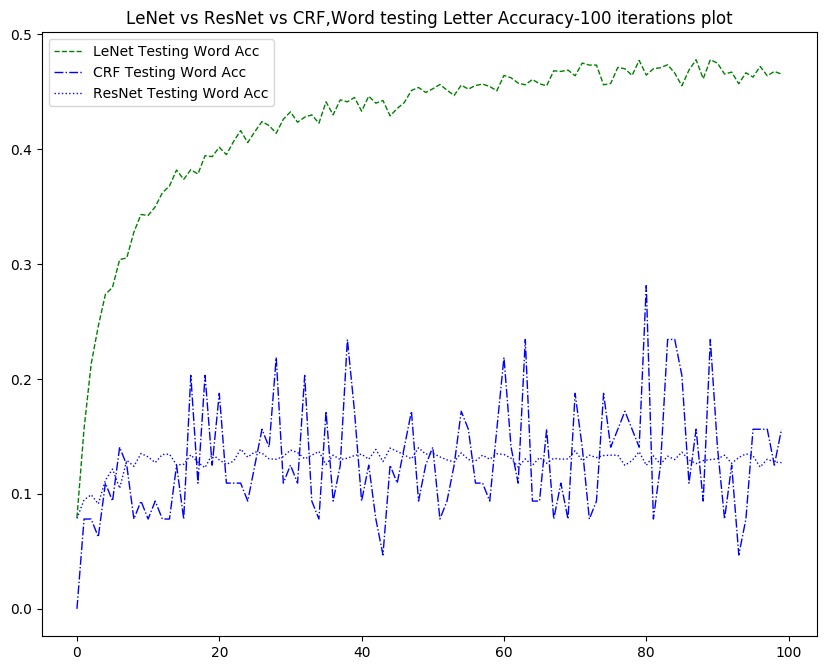

In [44]:


w = 10
h = 8
d = 100
plt.figure(figsize=(w, h), dpi=d)

#plt.plot(x, y1, color='red', linewidth=2,  label="Training Letter Acc")
#plt.plot(x, y2, color='red', linewidth=2,linestyle='dashdot',   label="Testing Letter Acc")
#plt.plot(x, y3, color='green', linewidth=1, label="Training Word Acc")
plt.plot(x, y4, color='green', linewidth=1,linestyle='dashed',  label="LeNet Testing Word Acc")
#plt.plot(x, y5, color='purple', linewidth=2, linestyle='dashdot', label="CRF Training Letter Acc")
#plt.plot(x, y6, color='purple', linewidth=2,linestyle='dashdot',   label="CRF Testing Letter Acc")
#plt.plot(x, y7, color='blue', linewidth=1, linestyle='dashdot',  label="CRF Training Word Acc")
plt.plot(x, y8, color='blue', linewidth=1,linestyle='dashdot',  label="CRF Testing Word Acc")
#plt.plot(x, y9, color='purple', linewidth=2, linestyle='dotted', label="ResNet Training Letter Acc")
#plt.plot(x, y10, color='purple', linewidth=2,linestyle='dotted',   label="ResNet Testing Letter Acc")
#plt.plot(x, y11, color='blue', linewidth=1, linestyle='dotted',  label="ResNet Training Word Acc")
plt.plot(x, y12, color='blue', linewidth=1,linestyle='dotted',  label="ResNet Testing Word Acc")
plt.title("LeNet vs ResNet vs CRF,Word testing Letter Accuracy-100 iterations plot")
plt.legend()

plt.savefig("accuracies.png")



In [45]:
max(crftestingepoc),max(crftrainingepoc),max(crfwtestingepoc),max(crfwtrainingepoc)

(0.7571428571428571, 0.9700460829493087, 0.28125, 0.8125)